# Graded Lab Assignment 2: Evaluate classifiers (10 points)
 
In this assignment you will optimize and compare the perfomance of a parametric (logistic regression) and non-parametric (k-nearest neighbours) classifier on the MNIST dataset.

Publish your notebook (ipynb file) to your Machine Learning repository on Github ON TIME. We will check the last commit on the day of the deadline.  

### Deadline Friday, November 17, 23:59.

This notebook consists of three parts: design, implementation, results & analysis. 
We provide you with the design of the experiment and you have to implement it and analyse the results.

### Criteria used for grading
* Explain and analyse all results.
* Make your notebook easy to read. When you are finished take your time to review it!
* You do not want to repeat the same chunks of code multiply times. If your need to do so, write a function. 
* The implementation part of this assignment needs careful design before you start coding. You could start by writing pseudocode.
* In this exercise the insights are important. Do not hide them somewhere in the comments in the implementation, but put them in the Analysis part
* Take care that all the figures and tables are well labeled and numbered so that you can easily refer to them.
* A plot should have a title and axes labels.
* You may find that not everything is 100% specified in this assignment. That is correct! Like in real life you probably have to make some choices. Motivate your choices.


### Grading points distribution

* Implementation 5 points
* Results and analysis 5 points

## Design of the experiment

You do not have to keep the order of this design and are allowed to alter it if you are confident.
* Import all necessary modules. Try to use as much of the available functions as possible. 
* Use the provided train and test set of MNIST dataset.
* Pre-process data eg. normalize/standardize, reformat, etc.           
  Do whatever you think is necessary and motivate your choices.
* (1) Train logistic regression and k-nn using default settings.
* Use 10-fold cross validation for each classifier to optimize the performance for one parameter: 
    * consult the documentation on how cross validation works in sklearn (important functions:             cross_val_score(), GridSearchCV()).
    * Optimize k for k-nn,
    * for logistic regression focus on the regularization parameter,
* (2) Train logistic regression and k-nn using optimized parameters.
* Show performance on the cross-validation set for (1) and (2) for both classifiers: 
    * report the average cross validation error rates (alternatively, the average accuracies - it's up to you) and standard deviation,
    * plot the average cross valildation errors (or accuracies) for different values of the parameter that you tuned. 
* Compare performance on the test set for two classifiers:
    * produce the classification report for both classifiers, consisting of precision, recall, f1-score. Explain and analyse the results.
    * print confusion matrix for both classifiers and compare whether they missclassify the same  classes. Explain and analyse the results.
* Discuss your results.
* BONUS: only continue with this part if you are confident that your implemention is complete 
    * tune more parameters of logistic regression
    * add additional classifiers (NN, Naive Bayes, decision tree), 
    * analyse additional dataset (ex. Iris dataset)

## Implementation of the experiment

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib



# Tuning hyper-parameters for precision

Best parameters set found on CV set:
LogisticRegression:  {'C': 0.1}
K-NN:  {'n_neighbors': 3}

0.933 (+/-0.037) for {'C': 0.01}
0.939 (+/-0.023) for {'C': 0.1}
0.935 (+/-0.026) for {'C': 0.3}
0.933 (+/-0.030) for {'C': 0.6}
0.933 (+/-0.033) for {'C': 1.0}
0.929 (+/-0.039) for {'C': 3.0}
0.928 (+/-0.041) for {'C': 5.0}
0.957 (+/-0.029) for {'n_neighbors': 2}
0.959 (+/-0.024) for {'n_neighbors': 3}
0.951 (+/-0.027) for {'n_neighbors': 4}
0.946 (+/-0.036) for {'n_neighbors': 5}
0.941 (+/-0.038) for {'n_neighbors': 6}
0.939 (+/-0.039) for {'n_neighbors': 7}

A Detailed classification report for Logistic Regression on the Test set:

             precision    recall  f1-score   support

          0       1.00      0.96      0.98        27
          1       0.79      0.84      0.81        31
          2       1.00      1.00      1.00        27
          3       0.86      0.63      0.73        30
          4       0.97      0.91      0.94        33
  

ValueError: x and y must have same first dimension, but have shapes (7,) and (3,)

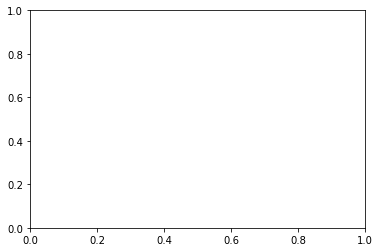

In [80]:
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import scipy.stats as stats

# load mnist dataset and split in train and test set.
digits = load_digits()

X_train_mnist = reshape(digits.images[:1500],(1500,64))
X_test_mnist = reshape(digits.images[1500:],(297,64))
y_train_mnist = digits.target[:1500]
y_test_mnist = digits.target[1500:]


#pre-processing data, it is necessary to normalize data to prevent bad behaviour of estimators
#due to individual features not adhering to a Gaussian distribution

stats.normaltest(X_train_mnist) #Use the normaltest() function to check if the data has a Normal distribution
                                #It turns out the data doesn't have a Normal dist. so we normalize the data
scaler = StandardScaler() 
scaler.fit(X_train_mnist)


# Set the parameters by cross-validation
tuned_parameters_logreg = [{'C':[0.01, 0.1, 0.3, 0.6, 1.0, 3.0, 5.0 ]}]
tuned_parameters_knnreg = [{'n_neighbors': [2, 3, 4, 5, 6, 7]}]

scores = ['precision', 'recall']

for score in scores:
    print()
    print("# Tuning hyper-parameters for %s" % score)
    print()
    
    print("Best parameters set found on CV set:")
    print("LogisticRegression: ", logreg.best_params_)
    print("K-NN: ", knnreg.best_params_)
    print()
    
    #Loading and Training Logistic Regression and K-NN
    
    
    logreg = GridSearchCV(LogisticRegression(), tuned_parameters_logreg, cv=3, refit=True, scoring='%s_macro' % score)
    #Loading in
    logreg.fit(X_train_mnist, y_train_mnist) 
    #Training
    
    knnreg = GridSearchCV(KNeighborsClassifier(), tuned_parameters_knnreg, cv=3, refit=True,scoring='%s_macro' % score)
    knnreg.fit(X_train_mnist, y_train_mnist)
    
    means_logreg = logreg.cv_results_['mean_test_score'] #Array of average validation scores on the CV sets
    stds_logreg = logreg.cv_results_['std_test_score'] #Array of Standard Deviations of the scores on the CV sets
    
    means_knnreg = knnreg.cv_results_['mean_test_score']
    stds_knnreg = knnreg.cv_results_['std_test_score']
    
    for mean, std, params in zip(means_logreg, stds_logreg, logreg.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
        
    for mean, std, params in zip(means_knnreg, stds_knnreg, knnreg.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
        
    print()
    print("A Detailed classification report for Logistic Regression on the Test set:")
    print()
    y_true, y_pred = y_test_mnist, logreg.predict(X_test_mnist) #Creates a classification report for LogReg then for K-NN
    print(classification_report(y_true, y_pred))
    print()
    print("A Detailed classification report for K-NN on the Test set:")
    print()
    y_true, y_pred = y_test_mnist, knnreg.predict(X_test_mnist)
    print(classification_report(y_true, y_pred))


#Predictions computed by LogisticRegression and K-NN for CV set
scores_logreg = cross_val_score(logreg, X_test_mnist, y_test_mnist, cv=3)
scores_knnreg = cross_val_score(knnreg, X_test_mnist, y_test_mnist, cv=3)

plt.plot(tuned_parameters_logreg[0]["C"], scores_logreg)
plt.ylabel('Score')
plt.show()

# your implementation here

## Results and analysis of the experiment

In [15]:
# discuss the results



##Testing

In [51]:
scores_knnreg

array([ 0.955992  ,  0.91786315,  0.97371098])

In [17]:
scores_logreg

array([ 0.91269841,  0.92      ,  0.95564516])

In [26]:
knnreg.cv_results_

{'mean_fit_time': array([ 0.01535495,  0.01836459,  0.01852687,  0.01519052,  0.0150218 ,
         0.01485499]),
 'mean_score_time': array([ 0.34069022,  0.43799861,  0.32900651,  0.32565665,  0.31813407,
         0.31446195]),
 'mean_test_score': array([ 0.95466667,  0.958     ,  0.94866667,  0.94333333,  0.938     ,
         0.936     ]),
 'mean_train_score': array([ 0.99233325,  0.99399726,  0.99233325,  0.99066657,  0.9903319 ,
         0.99033589]),
 'param_n_neighbors': masked_array(data = [2 3 4 5 6 7],
              mask = [False False False False False False],
        fill_value = ?),
 'params': ({'n_neighbors': 2},
  {'n_neighbors': 3},
  {'n_neighbors': 4},
  {'n_neighbors': 5},
  {'n_neighbors': 6},
  {'n_neighbors': 7}),
 'rank_test_score': array([2, 1, 3, 4, 5, 6], dtype=int32),
 'split0_test_score': array([ 0.95238095,  0.95634921,  0.94642857,  0.9484127 ,  0.94047619,
         0.93452381]),
 'split0_train_score': array([ 0.99196787,  0.99196787,  0.99196787,  0.9909638

In [39]:
acc_knnreg

0.89898989898989901

In [77]:
logreg.best_params_

{'C': 0.1}

In [79]:
tuned_parameters_logreg[0]["C"]


[0.01, 0.1, 0.3, 0.6, 1.0, 3.0, 5.0]